In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2
from psycopg2 import Error

try:
    # Connect to an existing database
    connection = psycopg2.connect(user="xst2267",
                                  password="password",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="2022-everything-team12")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [9]:
dept = pd.read_sql("select * from \"DEPTINFO\"", connection);
sku = pd.read_sql("select * from \"SKUINFO\"", connection);

/Users/xinshu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/xinshu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 

PostgreSQL connection is closed


In [11]:
df = pd.merge(dept,sku)

In [14]:
df.drop(['EXTRA_COL'],axis=1)

,DEPT,DEPTDESC,SKU,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,800,CLINIQUE,7915,007,400007915000,649G,15SOFTFAIR,SOFT FINIS,3,5511283,CLINIQUE
1,800,CLINIQUE,9633,007,400009633000,689U,01PALE,CITY BASE,3,5511283,CLINIQUE
2,800,CLINIQUE,9951,007,400009951000,635P,11BLACK V,LL SHINE,3,5511283,CLINIQUE
3,800,CLINIQUE,10896,007,400000896001,60QH,34NUDEBGE,SUPERBAL,3,5511283,CLINIQUE
4,800,CLINIQUE,12790,009,400002790001,6AKM72,DIRECTORY,COLLATERAL,1,5511283,CLINIQUE
...,...,...,...,...,...,...,...,...,...,...,...
1346351,9801,CATALIN,9999559,003,400009559999,U28674,MIDNITE ML,M,1,4310974,CAZIMI L
1346352,9801,CATALIN,9999605,121,400009605999,5 12909G,BLACK,10,1,5515994,SESSA
1346353,9801,CATALIN,9999784,004,400009784999,D20665,MULTI,L,1,21131,CEJON AC
1346354,9801,CATALIN,9999941,116,400009941999,N53363,CERISE,L,1,2013163,JANTZEN


<AxesSubplot:>

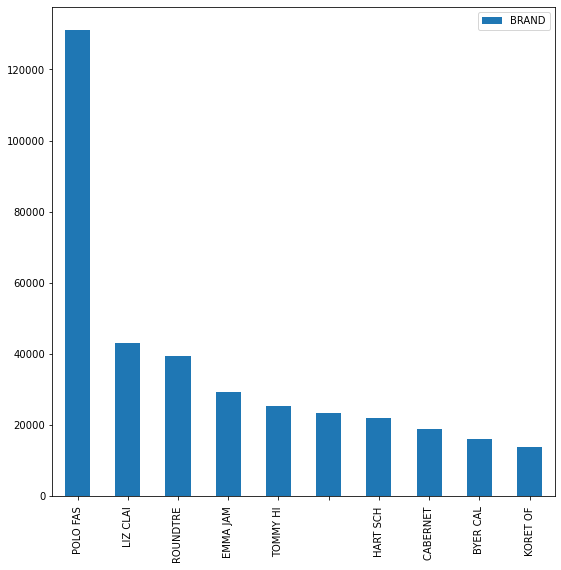

In [15]:
brand_count = pd.DataFrame(df.BRAND.value_counts())
brand_count.head(10).plot(kind = 'bar',figsize=(9,9))

<AxesSubplot:>

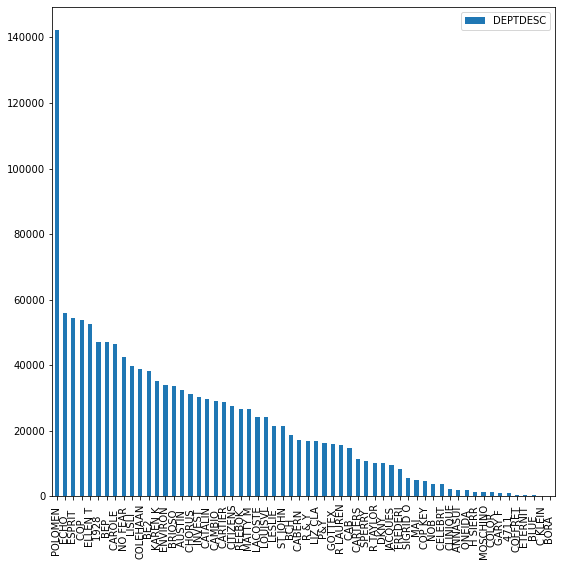

In [16]:
dept_count = pd.DataFrame(df.DEPTDESC.value_counts())
dept_count.plot(kind = 'bar',figsize=(9,9))

(array([1.345641e+06, 9.900000e+01, 7.900000e+01, 1.900000e+01,
        3.020000e+02, 1.730000e+02, 3.200000e+01, 4.000000e+00,
        6.000000e+00, 1.000000e+00]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

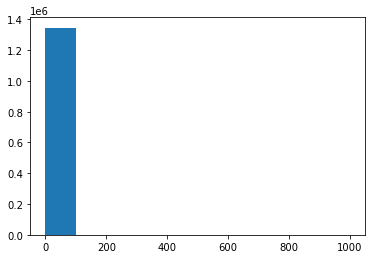

In [17]:
plt.hist(df['PACKSIZE'])

In [18]:
df[df['PACKSIZE']==0]

,DEPT,DEPTDESC,EXTRA_COL,SKU,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
24050,1100,GARY F,0,2359876,001,400009876235,74480,NA,NA,0,8514911,PUIG USA
36934,1202,CABERN,0,1419912,201,400009912141,FB74 3460-5,NA,NA,0,3213562,LCA INTI
110951,1905,R & Y,0,3269902,909,400009902326,33536,NA,NA,0,1013117,TOMMY HI
116432,1905,R & Y,0,6579901,909,400009901657,27769,NA,NA,0,1013117,TOMMY HI
186880,2301,BEP,0,6423903,405,400003903642,3P 611C30,BLACK,10,0,113327,K.G.R. I
273232,3103,COP,0,1574635,006,400004635157,103 106644,BST BLUE M,3,0,6076489,LEVI STR
298641,3103,COP,0,6383774,006,400003774638,103 106644,BST BLUE L,3,0,6076489,LEVI STR
298684,3103,COP,0,6393774,006,400003774639,103 106644,BST BLUE S,3,0,6076489,LEVI STR
298829,3103,COP,0,6423774,006,400003774642,103 106644,BST BLUE L,7,0,6076489,LEVI STR
298872,3103,COP,0,6433774,006,400003774643,103 106644,BST BLUE S,7,0,6076489,LEVI STR


In [19]:
df.describe()

,DEPT,EXTRA_COL,SKU,PACKSIZE,VENDOR
count,1.346356e+06,1.346356e+06,1.346356e+06,1.346356e+06,1.346356e+06
mean,5.070412e+03,4.760925e-02,4.997331e+06,1.272614e+00,4.520316e+06
std,2.276754e+03,2.129381e-01,2.884066e+06,9.331597e+00,2.973652e+06
min,8.000000e+02,0.000000e+00,3.000000e+00,0.000000e+00,1.000100e+04
25%,3.105000e+03,0.000000e+00,2.507504e+06,1.000000e+00,1.616222e+06
50%,4.505000e+03,0.000000e+00,4.991129e+06,1.000000e+00,5.316178e+06
75%,7.101000e+03,0.000000e+00,7.501184e+06,1.000000e+00,6.816221e+06
max,9.801000e+03,1.000000e+00,9.999997e+06,9.990000e+02,9.949200e+06
